<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

### Ejercicio 1:

In [3]:
#Se seleccionan las columnas numéricas:
standard_df = (df
               .select_dtypes(include=['int64','float64'])
               .drop(["id","diagnosis"],axis=1) #Se dropean estas dos columnas pues segun yo no aportan al análisis
              )
#Se estandariza mediante StandarScaler:
standard_df[standard_df.columns] = StandardScaler().fit_transform(standard_df[standard_df.columns])
standard_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### Ejercicio 2:

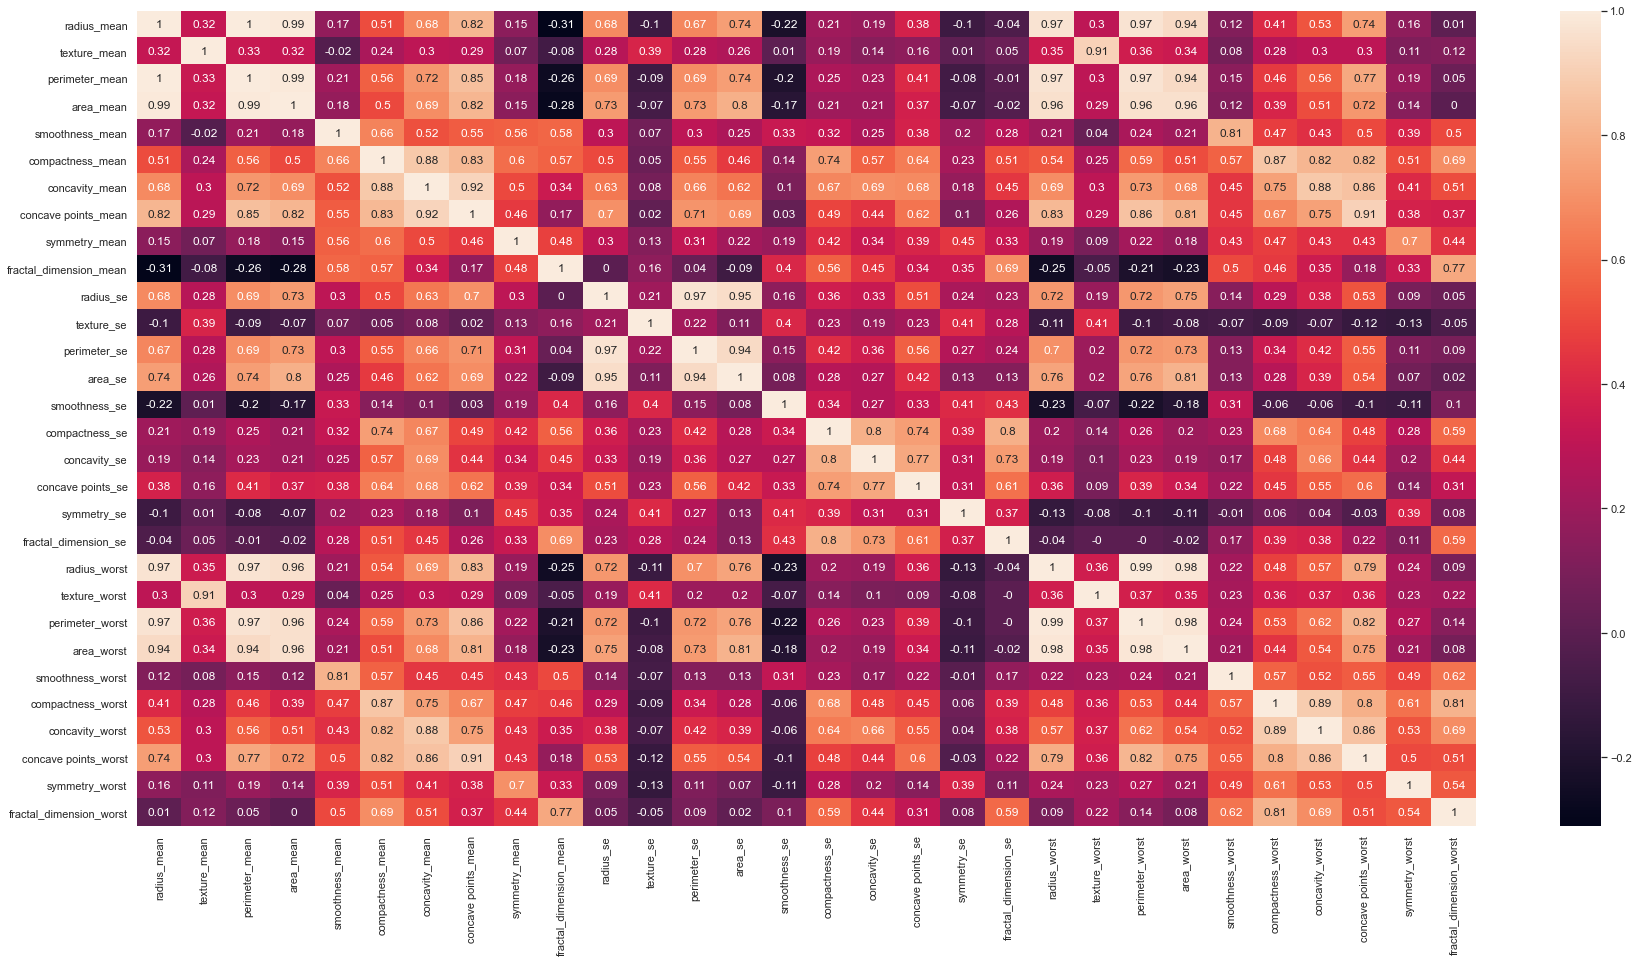

In [4]:
#Se crea un DataFrame con los coef de correlación entre las columnas de standard_df:
corrmatrix= standard_df.corr().round(2)

# Heatmap
fig = plt.figure(figsize=(30, 15)) # ventana
sns.heatmap(corrmatrix, annot = True,fmt="g") #Los argumentos son para mostrar el coef con todos los decimales en la celda
plt.show()

In [5]:
colineal=(corrmatrix[corrmatrix >= 0.94] #Se buscan las celdas con valor mayor o igual a 0.94
          .dropna(thresh = 2) #Se dropean las filas con menos de dos valores no nulos (en la diagonal obviamente habrán 1)
          .dropna(thresh = 1,axis=1) #Se dropean las columnas sin ningun vlor no nulo
          .fillna("") #Se Rellenan los valores nulos con ""
         )
colineal

,radius_mean,perimeter_mean,area_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst
radius_mean,1,1,0.99,,,,0.97,0.97,0.94
perimeter_mean,1,1,0.99,,,,0.97,0.97,0.94
area_mean,0.99,0.99,1,,,,0.96,0.96,0.96
radius_se,,,,1,0.97,0.95,,,
perimeter_se,,,,0.97,1,0.94,,,
area_se,,,,0.95,0.94,1,,,
radius_worst,0.97,0.97,0.96,,,,1,0.99,0.98
perimeter_worst,0.97,0.97,0.96,,,,0.99,1,0.98
area_worst,0.94,0.94,0.96,,,,0.98,0.98,1


### Colinealidad:
En la celda anterior se muestra un DataFrame con los coeficientes de correlación de pearson mayores o iguales a 0.94 (a mi criterio es casi colinealidad) de las columnas del DataFrame estandarizado.

### Ejercicio 3:

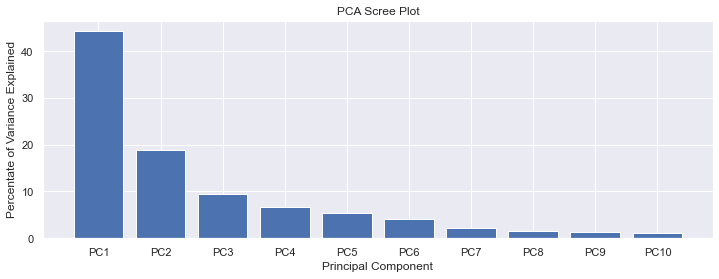

In [6]:
#El código lo saqué de la clase correspondiente a este lab
x = standard_df.values
pca = PCA(n_components=10) #Se especifican los 10 n_components
principalComponents = pca.fit_transform(x) #Se crean los componentes principales de standard_df

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = [f"PC{i}" for i in range(1,11)]

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

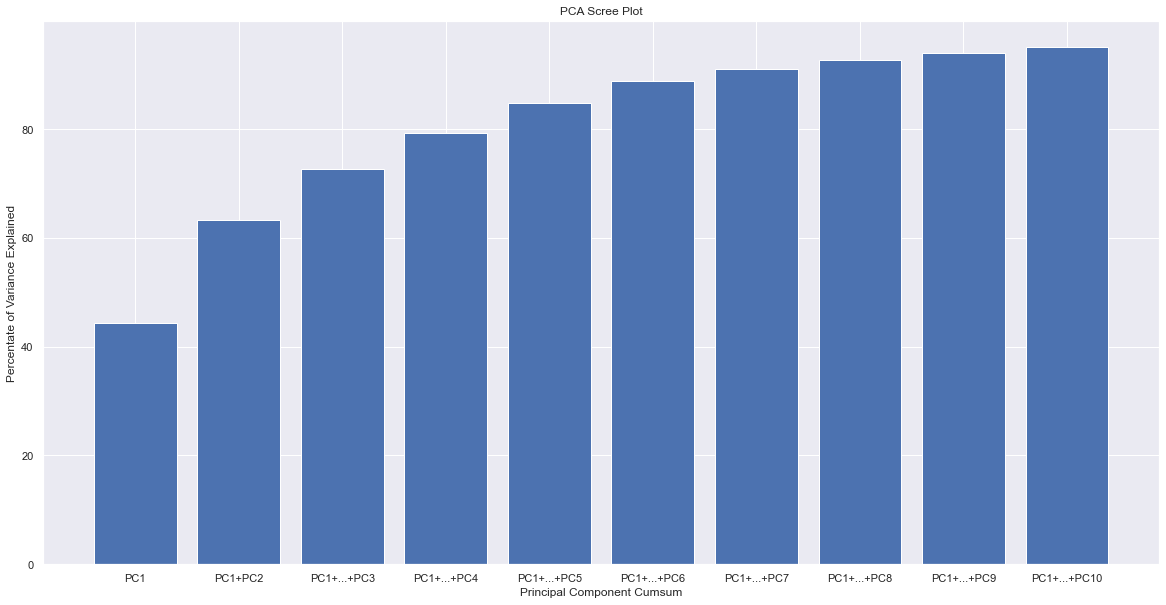

In [7]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)

columns_sum =[f"PC1+...+PC{i+1}" for i in range(2,10)]
columns_sum = ["PC1", "PC1+PC2"] + columns_sum

plt.figure(figsize=(20,10))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns_sum)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

### Interpretación:
Se observa que en los primeros principal components son los que tiene más variabilidad en los datos (representada por la varianza explicada en los histogramas). Esta variabilidad va bajando en los principal components siendo el PC1 el de mayor variabilidad y el PC10 el de menor. En la varianza acumulada se observa que al sumar todas las varianzas se obtiene el 100 porciento de variabilidad.

### Ejercicio 4:

In [8]:
principalDataframe = pd.DataFrame(
    data = principalComponents,
    columns = [f"PC{i}" for i in range(1,11)]
)
principalDataframe

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398410,-0.157118,-0.877401
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240989,-0.711905,1.106993
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097377,0.024065,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429909,1.059571,-1.405440,-1.116976
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636374,-0.263805,0.377704
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035468,0.987929,0.256991
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716327,-1.113357,-0.105208,-0.108630
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192759,0.341889,0.393917,0.520878
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567937,0.223082,-0.280241,-0.542034,-0.089299


### Ejercicio 5:

In [9]:
#Definición de metricas (sacado del archivo que el profesor nos entregó en un lab anterior)
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

def summary_metrics(y_pred,model_pred):
    """
    Aplicar las distintas metricas definidas
    :param y_pred,model_pred: pandas series del mismo largo a calcular metricas
    :return: No se retorna nada pero se printean las metricas
    """
    print('\nMatriz de confusion:\n ')
    print(confusion_matrix(y_pred,model_pred))
    
    # metrics
    
    print('\nMetricas:\n ')
    print('accuracy:   ',accuracy_score(y_pred, model_pred))
    print('recall:     ',recall_score(y_pred, model_pred))
    print('precision:  ',precision_score(y_pred, model_pred))
    print('f-score:    ',f1_score(y_pred, model_pred))
    print("")

    return

In [10]:
from sklearn.model_selection import train_test_split
#Creación del conjunto de testeo:
Y=df["diagnosis"]
x_train, x_pred, y_train, y_pred = train_test_split(principalDataframe, Y, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1998)

In [11]:
#Modelo de Regresión logística
from sklearn.linear_model import LogisticRegression

# Creando el modelo
logreg = LogisticRegression(solver='liblinear').fit(x_train, y_train)

# predecir
logreg_pred = pd.Series(logreg.predict(x_pred))

#metricas
summary_metrics(y_pred, logreg_pred)


Matriz de confusion:
 
[[128   3]
 [  0  69]]

Metricas:
 
accuracy:    0.985
recall:      1.0
precision:   0.9583333333333334
f-score:     0.9787234042553191



In [12]:
#Modelo de Arbol de clasificación
from sklearn.tree import DecisionTreeClassifier

# Creando el modelo
model = DecisionTreeClassifier()

#predicción
model.fit(x_train, y_train)
dt_pred = model.predict(x_pred)

#metricas
summary_metrics(y_pred, dt_pred)


Matriz de confusion:
 
[[121  10]
 [  6  63]]

Metricas:
 
accuracy:    0.92
recall:      0.9130434782608695
precision:   0.863013698630137
f-score:     0.8873239436619719



In [13]:
#Modelo SVC
from sklearn.svm import SVC

# Creando el modelo
svc_model = SVC()

#predicción
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_pred)

#metricas
summary_metrics(y_pred, svc_pred)


Matriz de confusion:
 
[[129   2]
 [  1  68]]

Metricas:
 
accuracy:    0.985
recall:      0.9855072463768116
precision:   0.9714285714285714
f-score:     0.9784172661870504

